In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Loading the results

In [37]:
wave = 7

wvs_mcm = pd.read_csv(f'../data/wvs_w{wave}_mcm.csv')
wvs_gpt3 = pd.read_csv('../data/wvs_w7_gpt3.csv')
wvs_gpt3_token_pairs = pd.read_csv('../data/wvs_w7_gpt3_token_pairs.csv')
wvs_gpt2 = pd.read_csv('../data/wvs_w7_gpt2_token_pairs.csv')
wvs_gpt2_universal = wvs_gpt2.loc[wvs_gpt2.country == 'universal']
uni_wvs_gp3 = pd.read_csv('../data/universal_wvs_w7_gpt3.csv')


pew_mcm = pd.read_csv('../data/pew_mcm.csv')
pew_gpt = pd.read_csv('../data/pew_gpt3.csv')
pew_gpt3_token_pairs = pd.read_csv('../data/pew_gpt3_token_pairs.csv')
pew_gpt2 = pd.read_csv('../data/pew_gpt2_token_pairs.csv')
uni_pew_gpt = pd.read_csv('../data/universal_pew_gpt3.csv')


In [46]:
list_rows = []

SBERT

In [47]:

wvs_mcm_nan_removed = wvs_mcm.loc[~pd.isna(wvs_mcm.wvs_score)]
r, p = scipy.stats.pearsonr(wvs_mcm_nan_removed['wvs_score'], wvs_mcm_nan_removed['universal_mcm_score'])
row = {'model': 'SBERT', 'r': r, 'p':p, 'dataset': 'WVS', 'n' : len(wvs_mcm_nan_removed['wvs_score'])}
list_rows.append(row)

r, p = scipy.stats.pearsonr(pew_mcm['pew_score'], pew_mcm['universal_mcm_score'])
row = {'model': 'SBERT', 'r': r, 'p':p, 'dataset': 'PEW', 'n': len(pew_mcm['pew_score'])}
list_rows.append(row)


GPT3-QA

In [49]:
wvs_gpt3 = wvs_gpt3.loc[~pd.isna(wvs_gpt3.wvs_score)]
uni_wvs_gp3 = uni_wvs_gp3.loc[~pd.isna(uni_wvs_gp3['wvs_score'])]
scipy.stats.pearsonr(uni_wvs_gp3['wvs_score'], uni_wvs_gp3['gpt3_score_mean'])
r, p = scipy.stats.pearsonr(uni_wvs_gp3['wvs_score'], uni_wvs_gp3['gpt3_score_mean'])
row = {'model': 'GPT3-QA', 'r': r, 'p':p, 'dataset': 'WVS','n':len(uni_wvs_gp3['wvs_score'])}
list_rows.append(row)


r, p = scipy.stats.pearsonr(uni_pew_gpt['pew_score'], uni_pew_gpt['gpt3_score_mean'])
row = {'model': 'GPT3-QA', 'r': r, 'p':p, 'dataset': 'PEW', 'n':len(uni_pew_gpt['pew_score'])}
list_rows.append(row)

GPT3-PROBS

In [26]:
wvs_gpt3_token_pairs_cultural = wvs_gpt3_token_pairs.loc[wvs_gpt3_token_pairs['country'] != 'universal']
wvs_gpt3_token_pairs_cultural = wvs_gpt3_token_pairs_cultural.loc[~pd.isna(wvs_gpt3_token_pairs_cultural['wvs_score'])]
wvs_gpt3_token_pairs_universal = wvs_gpt3_token_pairs.loc[wvs_gpt3_token_pairs['country'] == 'universal']

wvs_gpt3_token_pairs_cultural['universal log prob difference'] = \
[float(wvs_gpt3_token_pairs_universal.loc[wvs_gpt3_token_pairs_universal.topic == t]['log prob difference']) for t in list(wvs_gpt3_token_pairs_cultural.topic)]
r, p = scipy.stats.pearsonr(wvs_gpt3_token_pairs_cultural['wvs_score'], wvs_gpt3_token_pairs_cultural['universal log prob difference'])
row = {'model': 'GPT3-PROBS', 'r': r, 'p':p, 'dataset': 'WVS','n':len(wvs_gpt3_token_pairs_cultural['wvs_score'])}
list_rows.append(row)


universal_pew_gpt3_token_pairs = pew_gpt3_token_pairs.loc[pew_gpt3_token_pairs.country == 'universal']
pew_gpt3_token_pairs_cultural = pew_gpt3_token_pairs.loc[pew_gpt3_token_pairs.country != 'universal']
pew_gpt3_token_pairs_cultural['universal log prob difference'] = \
[float(universal_pew_gpt3_token_pairs.loc[universal_pew_gpt3_token_pairs.topic == t]['log prob difference']) for t in list(pew_gpt3_token_pairs_cultural.topic)]
r, p = scipy.stats.pearsonr(pew_gpt3_token_pairs_cultural['pew_score'], pew_gpt3_token_pairs_cultural['universal log prob difference'])
row = {'model': 'GPT3-PROBS', 'r': r, 'p':p, 'dataset': 'PEW','n':len(pew_gpt3_token_pairs_cultural['pew_score'])}
list_rows.append(row)


/var/folders/05/1_h8k5ns3f9b6j4pz3zct65r0000gn/T/ipykernel_8691/2045107598.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pew_gpt3_token_pairs_cultural['universal log prob difference'] = \


GPT2

In [27]:
wvs_gpt2 = wvs_gpt2.loc[~pd.isna(wvs_gpt2.wvs_score)]
wvs_gpt2_cultural = wvs_gpt2.loc[wvs_gpt2['country'] != 'universal']
wvs_gpt2_cultural['universal log prob difference'] = \
[float(wvs_gpt2_universal.loc[wvs_gpt2_universal.topic == t]['log prob difference']) for t in list(wvs_gpt2_cultural.topic)]
r, p = scipy.stats.pearsonr(wvs_gpt2_cultural['wvs_score'], wvs_gpt2_cultural['universal log prob difference'])
row = {'model': 'GPT2', 'r': r, 'p':p, 'dataset': 'WVS','n':len(wvs_gpt2_cultural['wvs_score'])}
list_rows.append(row)

In [28]:
models = ['gpt2', 'gpt2-medium','gpt2-large']
countries = list(wvs_mcm.country.unique())
for model in models:
    wvs_gpt2 = pd.read_csv(f'../data/wvs_w7_{model}_token_pairs.csv')
    wvs_gpt2_universal = wvs_gpt2.loc[wvs_gpt2.country == 'universal']
    
    wvs_gpt2 = wvs_gpt2.loc[~pd.isna(wvs_gpt2.wvs_score)]
    wvs_gpt2_cultural = wvs_gpt2.loc[wvs_gpt2['country'] != 'universal']
    
    wvs_gpt2_cultural['universal log prob difference'] = \
    [float(wvs_gpt2_universal.loc[wvs_gpt2_universal.topic == t]\
           ['log prob difference'].sample()) for t in list(wvs_gpt2_cultural.topic)]
    
    
    
    r, p = scipy.stats.pearsonr(wvs_gpt2_cultural['wvs_score'], 
                                wvs_gpt2_cultural['universal log prob difference'])
    
    row = {'model': model.upper(), 'r': r, 'p':p, 'dataset': 'WVS','n':len(wvs_gpt2_cultural['wvs_score'])}
    list_rows.append(row)
    
    
    pew_gpt2 = pd.read_csv(f'../data/pew_{model}_token_pairs.csv')
    pew_gpt2_cultural = pew_gpt2.loc[pew_gpt2['country'] != 'universal']
     
    universal_pew_gpt2 = pew_gpt2.loc[pew_gpt2.country == 'universal']
    pew_gpt2_cultural['universal log prob difference'] = \
    [float(universal_pew_gpt2.loc[universal_pew_gpt2.topic == t]['log prob difference'].sample()) for t in list(pew_gpt2_cultural.topic)]
    r, p = scipy.stats.pearsonr(pew_gpt2_cultural['pew_score'], \
                                pew_gpt2_cultural['universal log prob difference'])
    
    row = {'model': model.upper(), 'r': r, 'p':p, 'dataset': 'PEW','n':len(pew_gpt2_cultural['pew_score'])}
    list_rows.append(row)



/var/folders/05/1_h8k5ns3f9b6j4pz3zct65r0000gn/T/ipykernel_8691/1602355441.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pew_gpt2_cultural['universal log prob difference'] = \
/var/folders/05/1_h8k5ns3f9b6j4pz3zct65r0000gn/T/ipykernel_8691/1602355441.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pew_gpt2_cultural['universal log prob difference'] = \
/var/folders/05/1_h8k5ns3f9b6j4pz3zct65r0000gn/T/ipykernel_8691/1602355441.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy o

# Homogeneous norms

SBERT

In [29]:
row = {'model':'SBERT','r' : 0.79, 'p': None, 'dataset' : 'Homogeneous norms'}
list_rows.append(row)

GPT3-QA

In [30]:
gpt3_amt = pd.read_csv(f'../data/MorT_actions/gpt3_mort_userstudy_globalAMT.csv')
r, p = scipy.stats.pearsonr(gpt3_amt['gpt3_score_mean'], gpt3_amt['user_score'])
row = {'model':'GPT3-QA','r' : r, 'p': p, 'dataset' : 'Homogeneous norms','n':len(gpt3_amt['user_score'])}
list_rows.append(row)

GPT3-PROBS

In [31]:
gpt3_amt = pd.read_csv(f'../data/MorT_actions/gpt3_mort_userstudy_globalAMT_token_pairs.csv')
gpt3_amt = gpt3_amt.loc[~pd.isna(gpt3_amt['user_score_globalAMT'])]
r, p = scipy.stats.pearsonr(gpt3_amt['log prob difference'], gpt3_amt['user_score_globalAMT'])
row = {'model':'GPT3-PROBS','r' : r, 'p': p, 'dataset' : 'Homogeneous norms','n':len(gpt3_amt['user_score_globalAMT'])}
list_rows.append(row)

GPT2

In [33]:
def get_correlation(prompts,metric_name, user_study = 'globalAMT'):
    user_ratings = []
    perplexity = []
    text = []
    does = []
    for row in prompts:
        if f'user_score_{user_study}' not in row:
            continue
        user_score = row[f'user_score_{user_study}']

        text.append(row['aa'] + ' ' + row['aci'])
        user_ratings.append(user_score)
        perplexity.append(row[metric_name])
        if user_score >= 0:
            does.append(True)
        else:
            does.append(False)
    
    does_ids = [i for i in range(len(does)) if does[i] == True]
    donts_ids = [i for i in range(len(does)) if does[i] == False]
    user_ratings_does = np.array(user_ratings)[does_ids]
    perplexity_does = np.array(perplexity)[does_ids]

    user_ratings_donts = np.array(user_ratings)[donts_ids]
    perplexity_donts = np.array(perplexity)[donts_ids]
    
    return scipy.stats.pearsonr(user_ratings, perplexity), len(user_ratings)

   



In [34]:
for model in models:
    prompts = pickle.load(open(f'../data/MoRT_actions/prompts_{model}_pair_logprob_userstudy_globalAMT_style_mv_at_end_use_last_token_True.p', 'rb'))
    (r, p),n = get_correlation(prompts, 'log prob difference')
    row = {'model':model.upper(),'r' : r, 'p': p, 'dataset' : 'Homogeneous norms',
          'n': n}
    list_rows.append(row)

In [35]:
df = pd.DataFrame(list_rows)


In [36]:
from statsmodels.stats.multitest import multipletests
df['p'] = multipletests(df['p'], method = 'bonferroni', alpha = 0.5)[1]
df

,model,r,p,dataset,n
0,SBERT,0.209322,2.308256e-10,WVS,1028.0
1,SBERT,-0.038478,1.000000e+00,PEW,312.0
2,GPT3-QA,0.329309,3.803282e-26,WVS,1028.0
3,GPT3-QA,0.391280,1.408443e-11,PEW,312.0
4,GPT3-PROBS,0.345986,5.331089e-29,WVS,1028.0
5,GPT3-PROBS,0.339773,1.366806e-08,PEW,312.0
6,GPT2,0.175816,2.643196e-07,WVS,1028.0
7,GPT2,0.175816,2.643196e-07,WVS,1028.0
8,GPT2,-0.069006,1.000000e+00,PEW,312.0
9,GPT2-MEDIUM,0.181037,9.578648e-08,WVS,1028.0


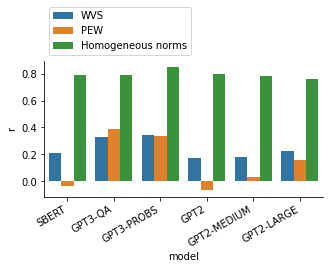

In [16]:

fig, axes = plt.subplots(figsize = (5, 2.5))
g = sns.barplot(data = df, x = 'model', y = 'r',hue = 'dataset' )
g.set_xticklabels(rotation=30, labels = g.get_xticklabels(),ha = 'right')
sns.despine(left = False)

    
g.legend(loc='center left', bbox_to_anchor=(0,1.22))
plt.show()